<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hierarchical Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("cluster_mpg.csv")

In [32]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [19]:
X = df.drop("name", axis=1)

In [20]:
X = pd.get_dummies(X, drop_first=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X = scaler.fit_transform(X)

In [23]:
X

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 1.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 1.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 1.        , 0.        ,
        1.        ]])

##Dendrogram

In [ ]:
plt.figure(figsize=(12,8))
sns.clustermap(X)

In [ ]:
sns.clustermap(X, row_cluster=False)

In [ ]:
sns.clustermap(X, col_cluster=False)

##Hierarchical Clustering with Scikit-Learn

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
model = AgglomerativeClustering(n_clusters=4)

In [37]:
preds = model.fit_predict(X)

<Axes: xlabel='mpg', ylabel='weight'>

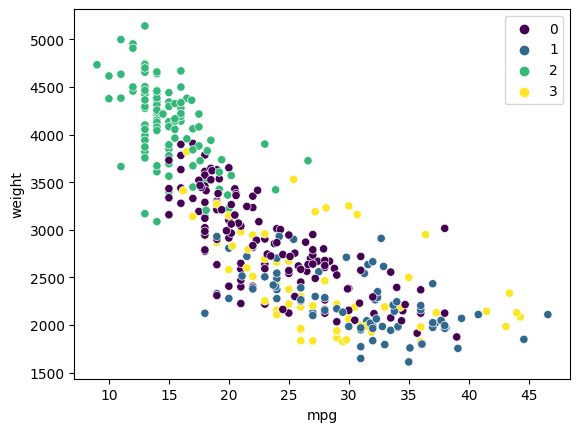

In [39]:

sns.scatterplot(data=df, x="mpg", y="weight", hue= preds, palette="viridis")

##Max Distance Between Points (in a scaled feature space)

Because each feature can have the max value of 1, we can calculate the maximum difference between two points using
```
max_distance = sqrt(n_features)
```

In [41]:
max_distance = np.sqrt(len(df.columns))
max_distance

3.0

In [46]:
model2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [47]:
preds2 = model2.fit_predict(X)

In [48]:
preds2

array([247, 252, 360, 302, 319, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 291, 310, 383,
       290, 205, 355, 275, 202, 289, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 243, 168, 378, 331, 201, 268, 256, 376,
       250, 197, 251, 371, 324, 230, 203, 261, 380, 187, 307, 389, 332,
       306, 236, 391, 350, 274, 288, 280, 231, 285, 100, 295, 210, 248,
       361, 390, 373, 266, 301, 369, 212, 357, 191, 313, 208, 228, 343,
       294, 379, 322, 321, 362, 188, 296, 374, 286, 125, 229, 244, 144,
       349, 359, 259, 213, 276, 215, 222, 204, 179, 287, 368, 387, 309,
       220, 216, 264, 260, 189, 340, 346, 143, 342, 227, 388, 370, 218,
       356, 327, 347, 278, 271, 258, 282, 318, 277, 123, 172, 382, 363,
       364, 195, 137, 249, 181, 262, 367, 186, 273, 138, 146, 255, 366,
       115, 385, 192, 372, 267, 233, 270, 263, 133, 165, 323, 198,  97,
       315, 269, 207, 147, 351, 134, 348,  98, 214,  48, 353, 17

##Scipy Dendrogram

In [49]:
from scipy.cluster.hierarchy import dendrogram

In [50]:
from scipy.cluster import hierarchy

In [ ]:
model2.children_

In [52]:
linkage_matrix = hierarchy.linkage(model2.children_)

In [53]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

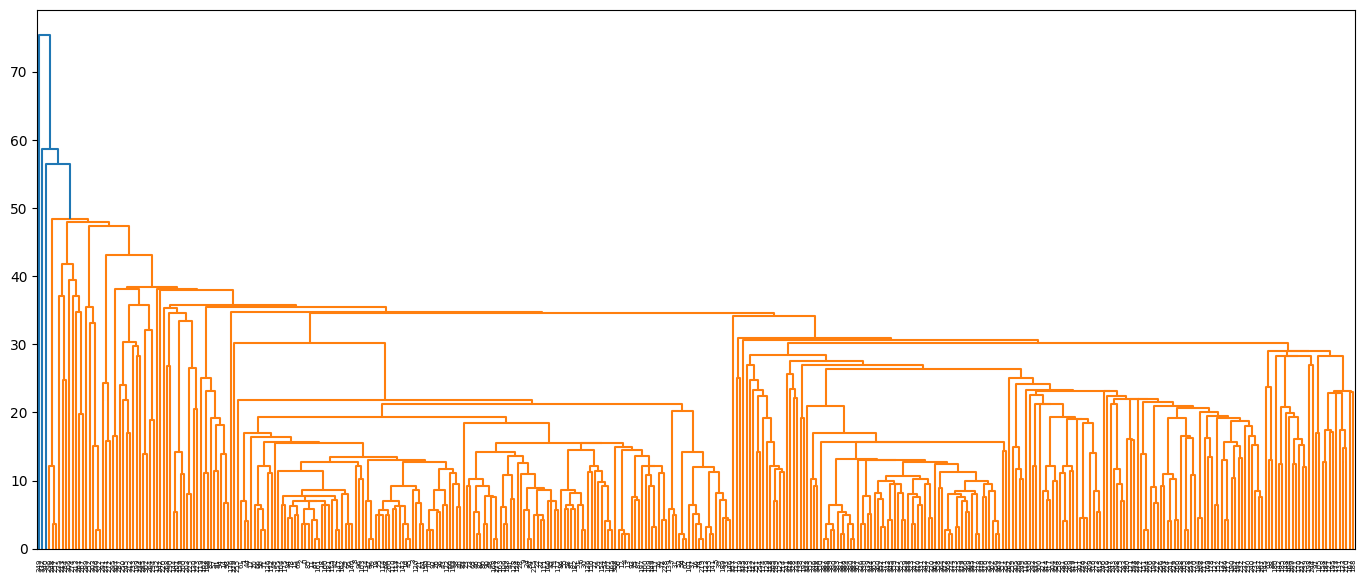

In [58]:
plt.figure(figsize=(17,7))
dendro = dendrogram(linkage_matrix)

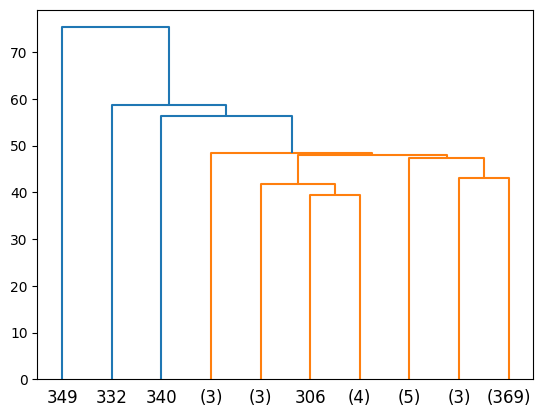

In [55]:
dendro = dendrogram(linkage_matrix, truncate_mode="lastp", p=10)

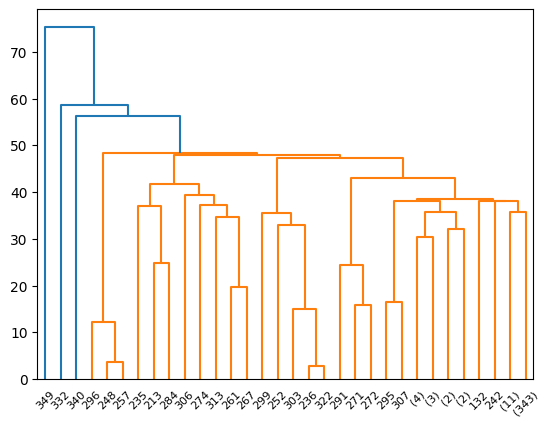

In [57]:
dendro = dendrogram(linkage_matrix, truncate_mode="level", p=10)

##Check Out Distances

In [65]:
df["mpg"].idxmax()

320

In [66]:
df["mpg"].idxmin()

28

In [68]:
p1 = X[df["mpg"].idxmax()]
p2 = X[df["mpg"].idxmin()]

In [70]:
distance = np.linalg.norm(p1 - p2)

In [71]:
distance

2.3852929970374714